In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [97]:
df = pd.read_csv("C:/Users/samyh/Desktop/diabetes.csv")

In [98]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


# Preprocessing

In [99]:
X = df.drop("Outcome", axis=1)
y= df["Outcome"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print("Classification report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Logistic Regression charts

Text(0.5, 1.0, 'Probability Distribution')

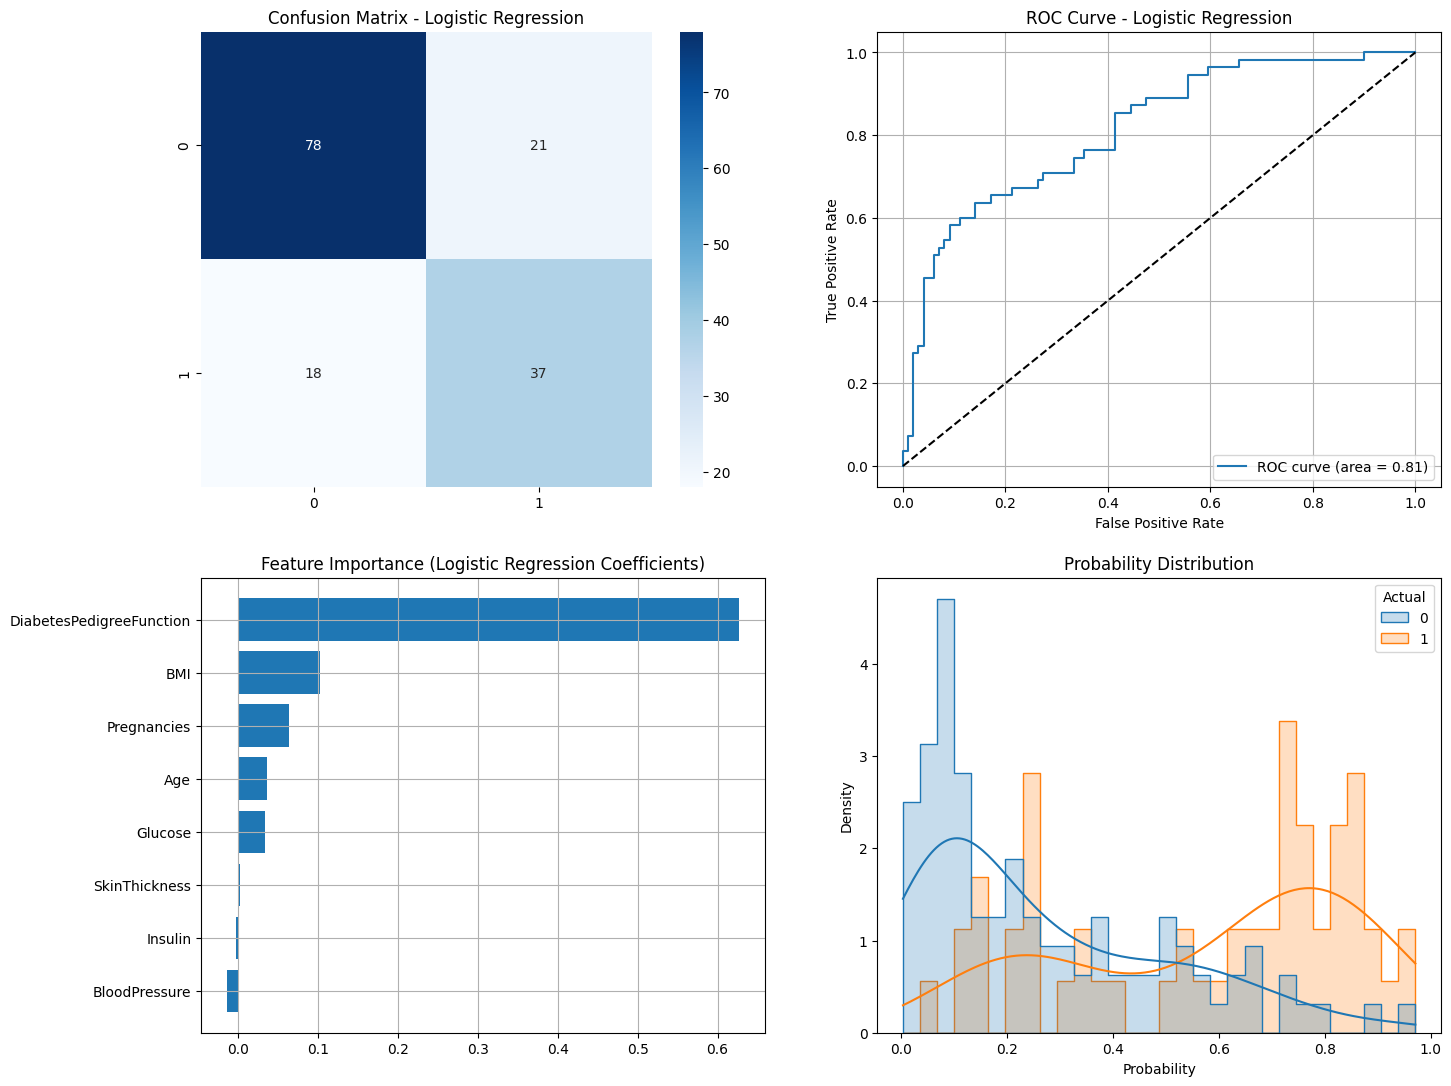

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression")

#ROC plot
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log_reg)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Logistic Regression")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
coefs = log_reg.coef_[0]
features = X.columns  
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
coef_df = coef_df.sort_values(by='Coefficient')
axes[2].barh(coef_df['Feature'], coef_df['Coefficient'])
axes[2].set_title("Feature Importance (Logistic Regression Coefficients)")
axes[2].grid(True)


# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_log_reg, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')



### Use Scaled data for Logistic Regression

In [105]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Confusion matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log_reg), "\n")
print("Classification report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

Confusion matrix for Logistic Regression:
 [[79 20]
 [18 37]] 

Classification report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)
cm_naive_bayes = confusion_matrix(y_test, y_pred_log_reg)


print("Classification report for Naive Bayes:\n", classification_report(y_test, y_pred_naive_bayes))


Classification report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## Naive Bayes Charts

Text(0.5, 1.0, 'Probability Distribution')

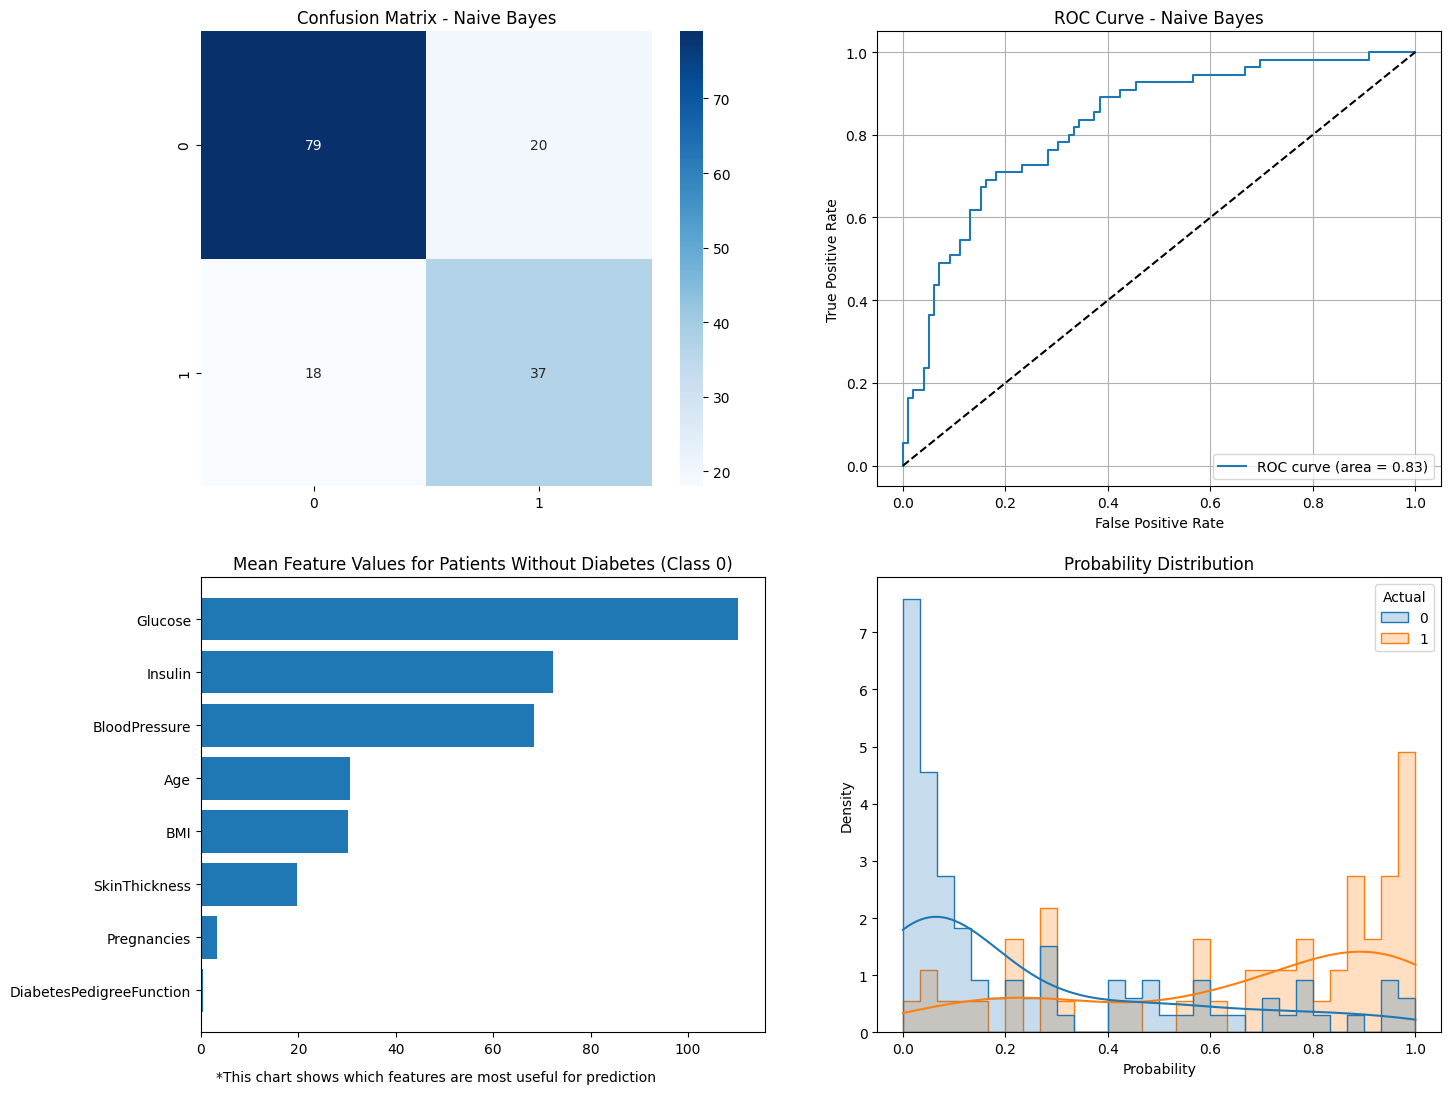

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#Confusion matrix heatmap plot
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Naive Bayes")

#ROC plot
y_prob_naive_bayes = naive_bayes.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_naive_bayes)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Naive Bayes")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance 
means = naive_bayes.theta_[0] 
sorted_indices = np.argsort(means)
stds = np.sqrt(naive_bayes.var_[0]) 
features = X_train.columns
ordered_features = features[sorted_indices]
ordered_means = means[sorted_indices]
axes[2].barh(ordered_features, ordered_means)
axes[2].set_title("Mean Feature Values for Patients Without Diabetes (Class 0)")
explanation = "*This chart shows which features are most useful for prediction"
axes[2].text(3, -1.5, explanation, ha='left', va='top', wrap=True, fontsize=10)





# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_naive_bayes, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')

# KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

print("Classification report for KNN:\n", classification_report(y_test, y_pred_KNN))

Classification report for KNN:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154



### Used Scaled Data KNN

In [111]:
KNN.fit(X_train_scaled, y_train)
y_pred_KNN_scaled = KNN.predict(X_test_scaled)

cm_KNN_scaled = confusion_matrix(y_test, y_pred_KNN_scaled)

print("Classification report for KNN_Scaled:\n", classification_report(y_test, y_pred_KNN_scaled))

Classification report for KNN_Scaled:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



# KNN Charts

Text(0.5, 1.0, 'Probability Distribution KNN SCALED')

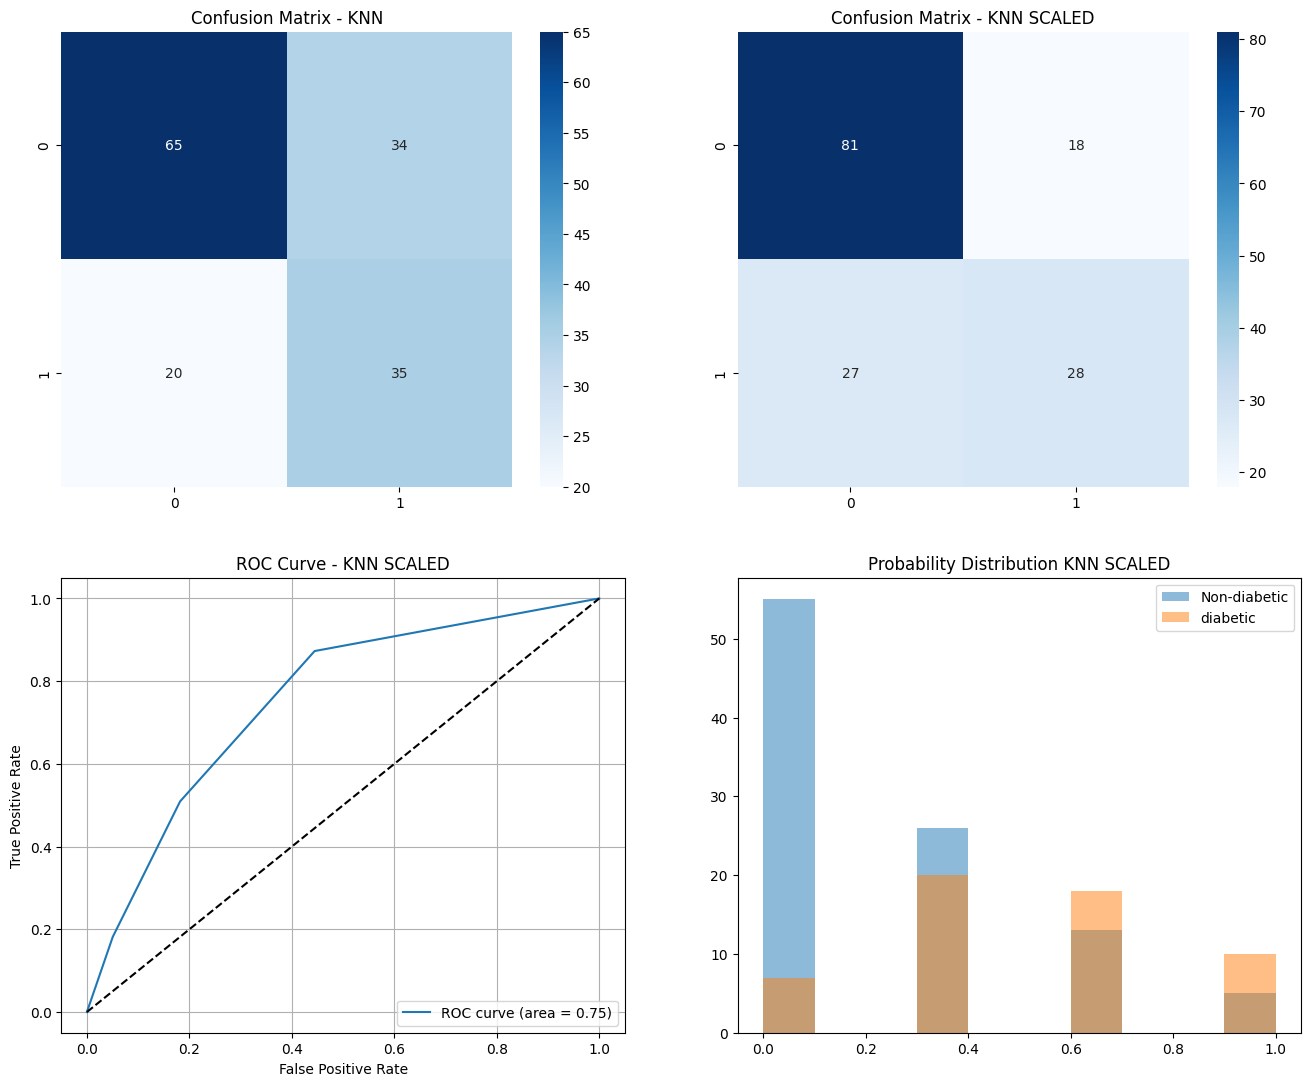

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - KNN")


sns.heatmap(cm_KNN_scaled, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - KNN SCALED")

#ROC plot
y_prob_KNN = KNN.predict_proba(X_test_scaled)[:, 1]                 # Use Feature Scaling (Critical for KNN) 
fpr, tpr, thresholds = roc_curve(y_test, y_prob_KNN)
roc_auc = auc(fpr, tpr)
axes[2].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[2].plot([0, 1], [0, 1], "k--")  
axes[2].set_xlabel("False Positive Rate")
axes[2].set_ylabel("True Positive Rate")
axes[2].set_title("ROC Curve - KNN SCALED")
axes[2].legend(loc="lower right")
axes[2].grid(True)

#probability
axes[3].hist(y_prob_KNN[y_test==0], alpha=0.5, label='Non-diabetic')
axes[3].hist(y_prob_KNN[y_test==1], alpha=0.5, label='diabetic')
axes[3].legend()
axes[3].set_title('Probability Distribution KNN SCALED')


# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [114]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Classification report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Classification report for Decision Tree:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        99
           1       0.63      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154



# Decision Tree Charts

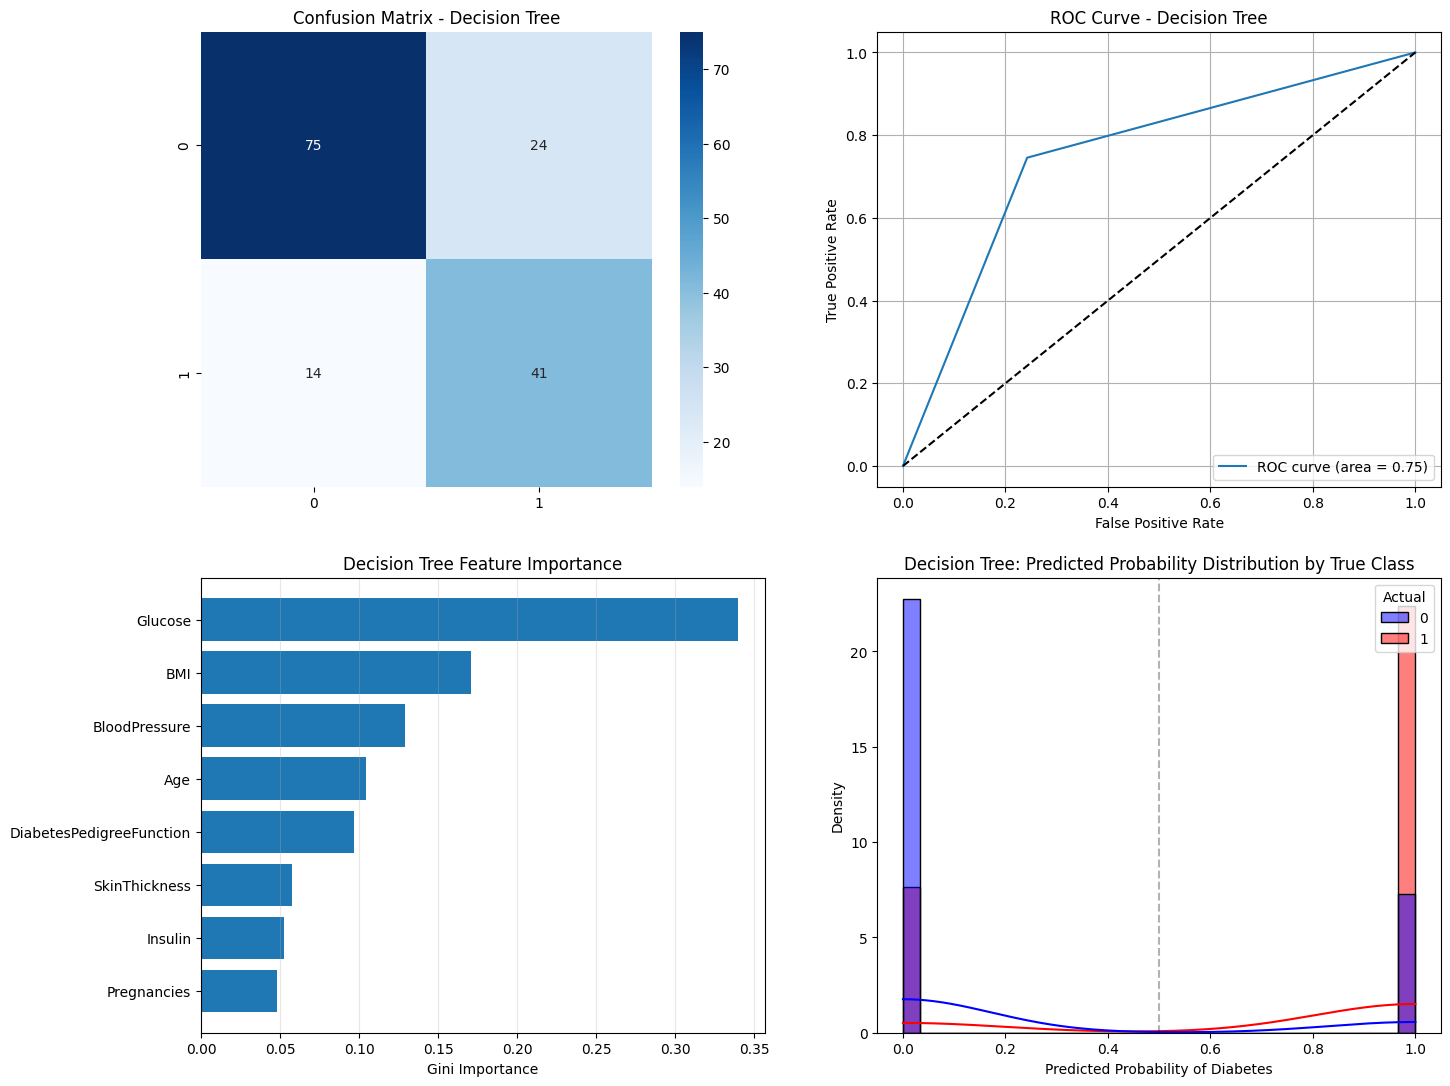

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Decision Tree")

#ROC plot
y_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Decision Tree")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance')

axes[2].barh(importance['Feature'], importance['Importance'], color='#1f77b4')
axes[2].set_title('Decision Tree Feature Importance')
axes[2].set_xlabel('Gini Importance')
axes[2].grid(axis='x', alpha=0.3)


# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_dt, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, stat='density', common_norm=False,
    palette={0: 'blue', 1: 'red'}
)
axes[3].set_title('Decision Tree: Predicted Probability Distribution by True Class')
axes[3].set_xlabel('Predicted Probability of Diabetes')
axes[3].axvline(0.5, color='black', linestyle='--', alpha=0.3)
 

# Random Forrest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Classification report for Random Forrest:\n", classification_report(y_test, y_pred_rf))

Classification report for Random Forrest:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.60      0.60      0.60        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



## Random Foresr Charts

Text(0.5, 1.0, 'Probability Distribution')

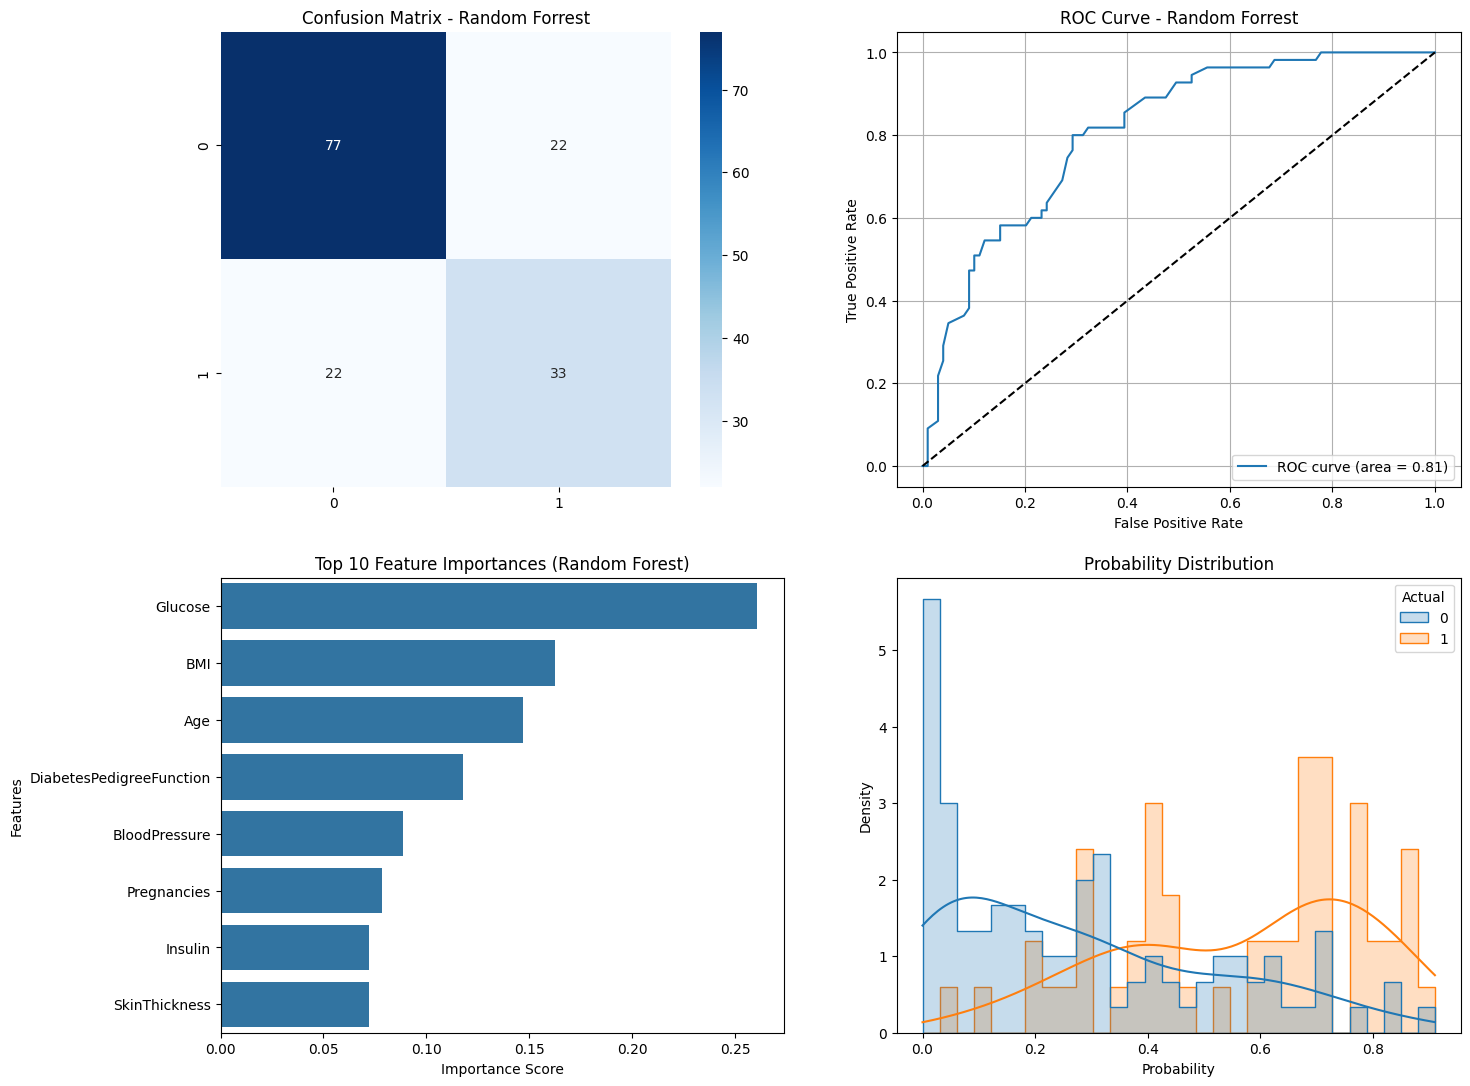

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Random Forrest")

#ROC plot
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Random Forrest")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], ax=axes[2])
axes[2].set_title("Top 10 Feature Importances (Random Forest)")
axes[2].set_xlabel("Importance Score")
axes[2].set_ylabel("Features")

# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_rf, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')

# SVM

In [119]:
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [120]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("Classification report for SVM:\n", classification_report(y_test, y_pred_svm))


Classification report for SVM:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Used Scaled Data SVM

In [121]:
svm.fit(X_train_scaled, y_train)
y_pred_svm_scaled = svm.predict(X_test_scaled)
cm_svm_scaled = confusion_matrix(y_test, y_pred_svm_scaled)

print("Classification report for SVM_Scaled:\n", classification_report(y_test, y_pred_svm_scaled))

Classification report for SVM_Scaled:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



## SVM Charts

c:\Users\samyh\miniforge3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Performance Metrics')

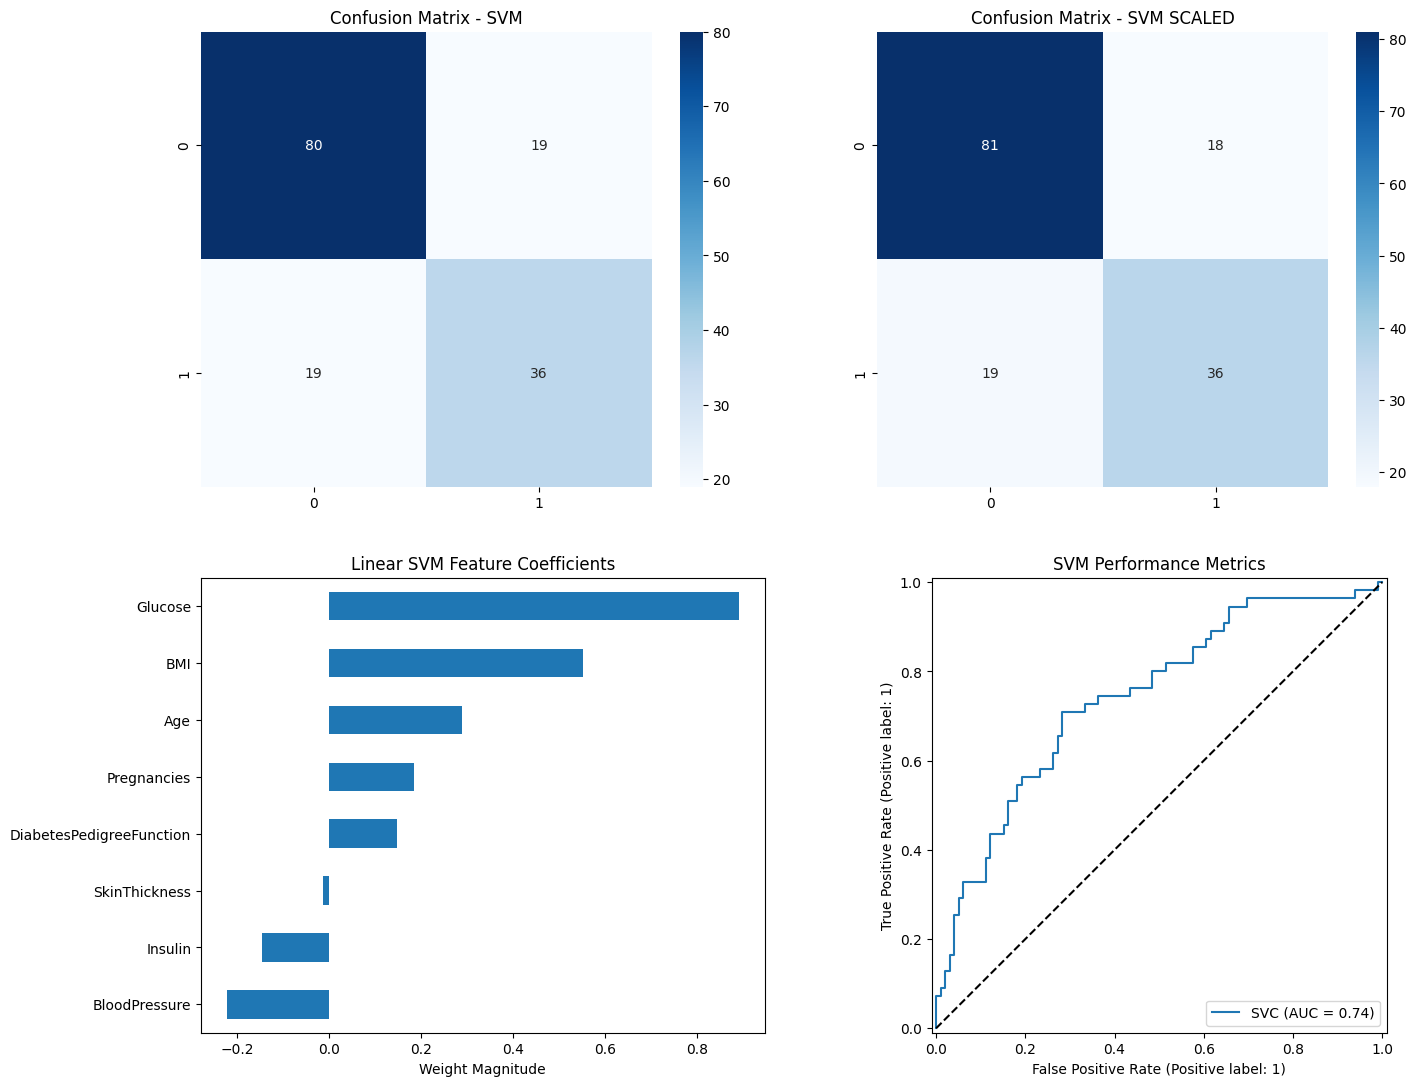

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - SVM")

#confusion matrix scaled heatmap plot
sns.heatmap(cm_svm_scaled, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - SVM SCALED")


#Feature importance plot
coef = pd.Series(svm.coef_[0], index=X_train.columns).sort_values()
coef.plot(kind='barh', ax=axes[2])
axes[2].set_title("Linear SVM Feature Coefficients")
axes[2].set_xlabel("Weight Magnitude")

#ROC plot
RocCurveDisplay.from_estimator(svm, X_test, y_test, ax=axes[3])
axes[3].plot([0, 1], [0, 1], "k--")  
axes[3].set_title("SVM Performance Metrics")







# ADABOOST

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

print("Classification report for ADABOOST:\n", classification_report(y_test, y_pred_adaboost))

Classification report for ADABOOST:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



## ADABOOST Charts

Text(0.5, 1.0, 'Probability Distribution')

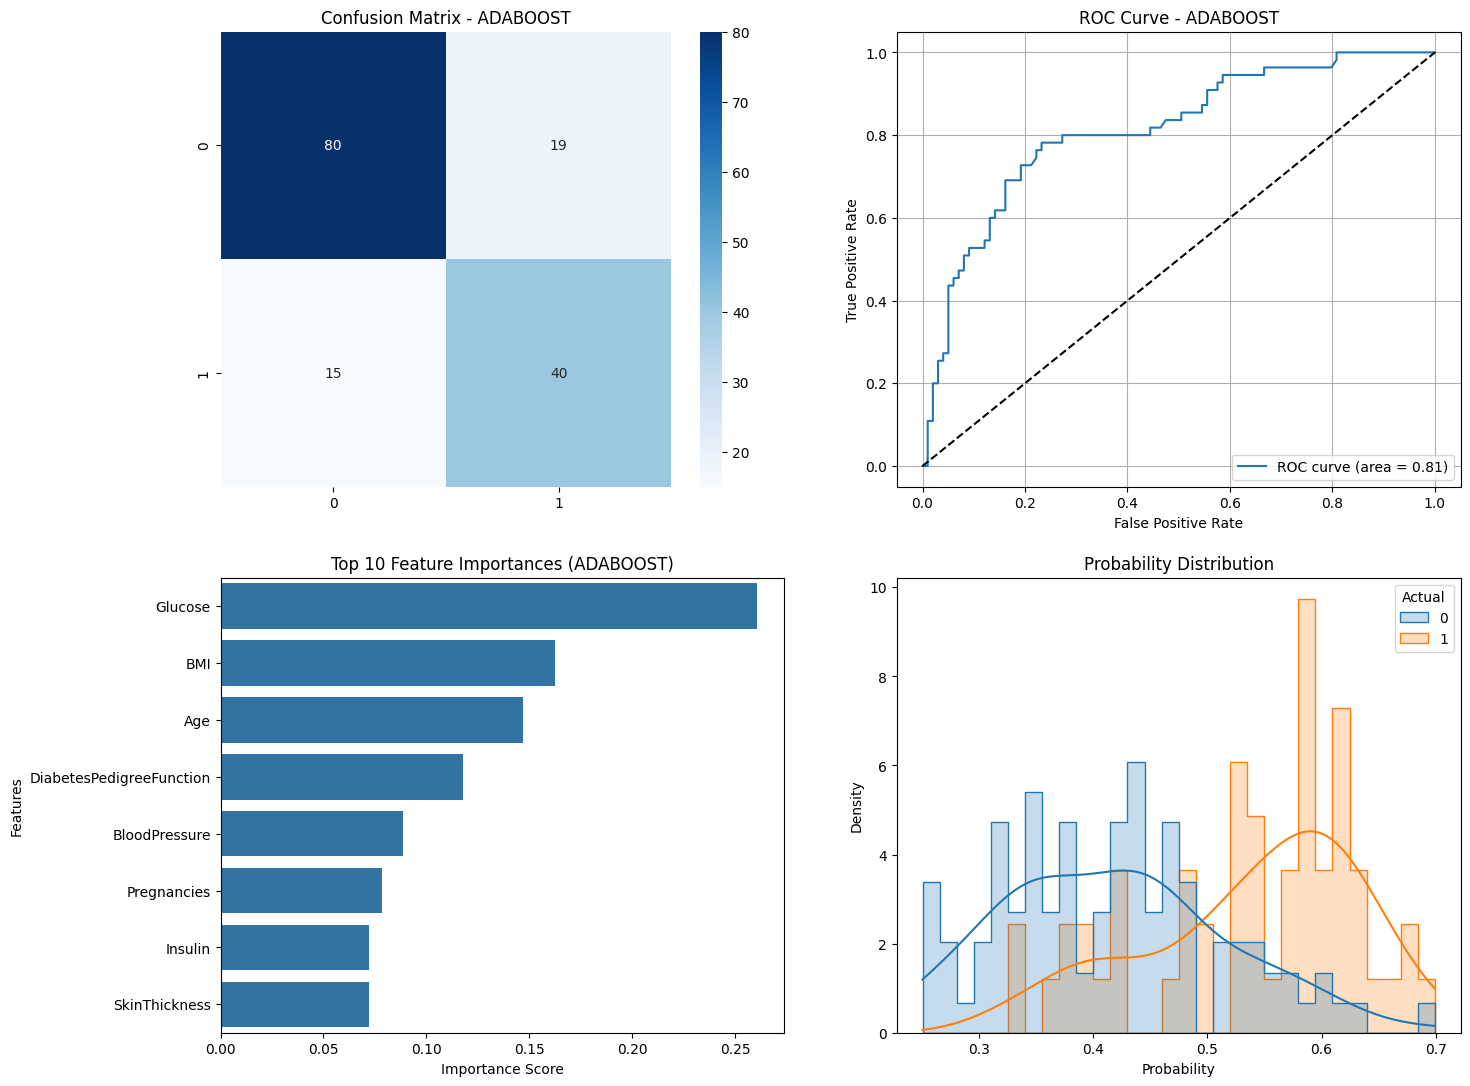

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - ADABOOST")

#ROC plot
y_prob_adaboost = adaboost.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_adaboost)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - ADABOOST")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], ax=axes[2])
axes[2].set_title("Top 10 Feature Importances (ADABOOST)")
axes[2].set_xlabel("Importance Score")
axes[2].set_ylabel("Features")

# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_adaboost, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')

# XGBOOST

In [126]:
from xgboost import XGBRFClassifier

In [128]:
xgb = XGBRFClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

cm_xgb = confusion_matrix(y_test, y_pred_svm)

print("Classification report for XGBOOST:\n", classification_report(y_test, y_pred_xgb))

Classification report for XGBOOST:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## XGBOOST Charts

Text(0.5, 1.0, 'Probability Distribution')

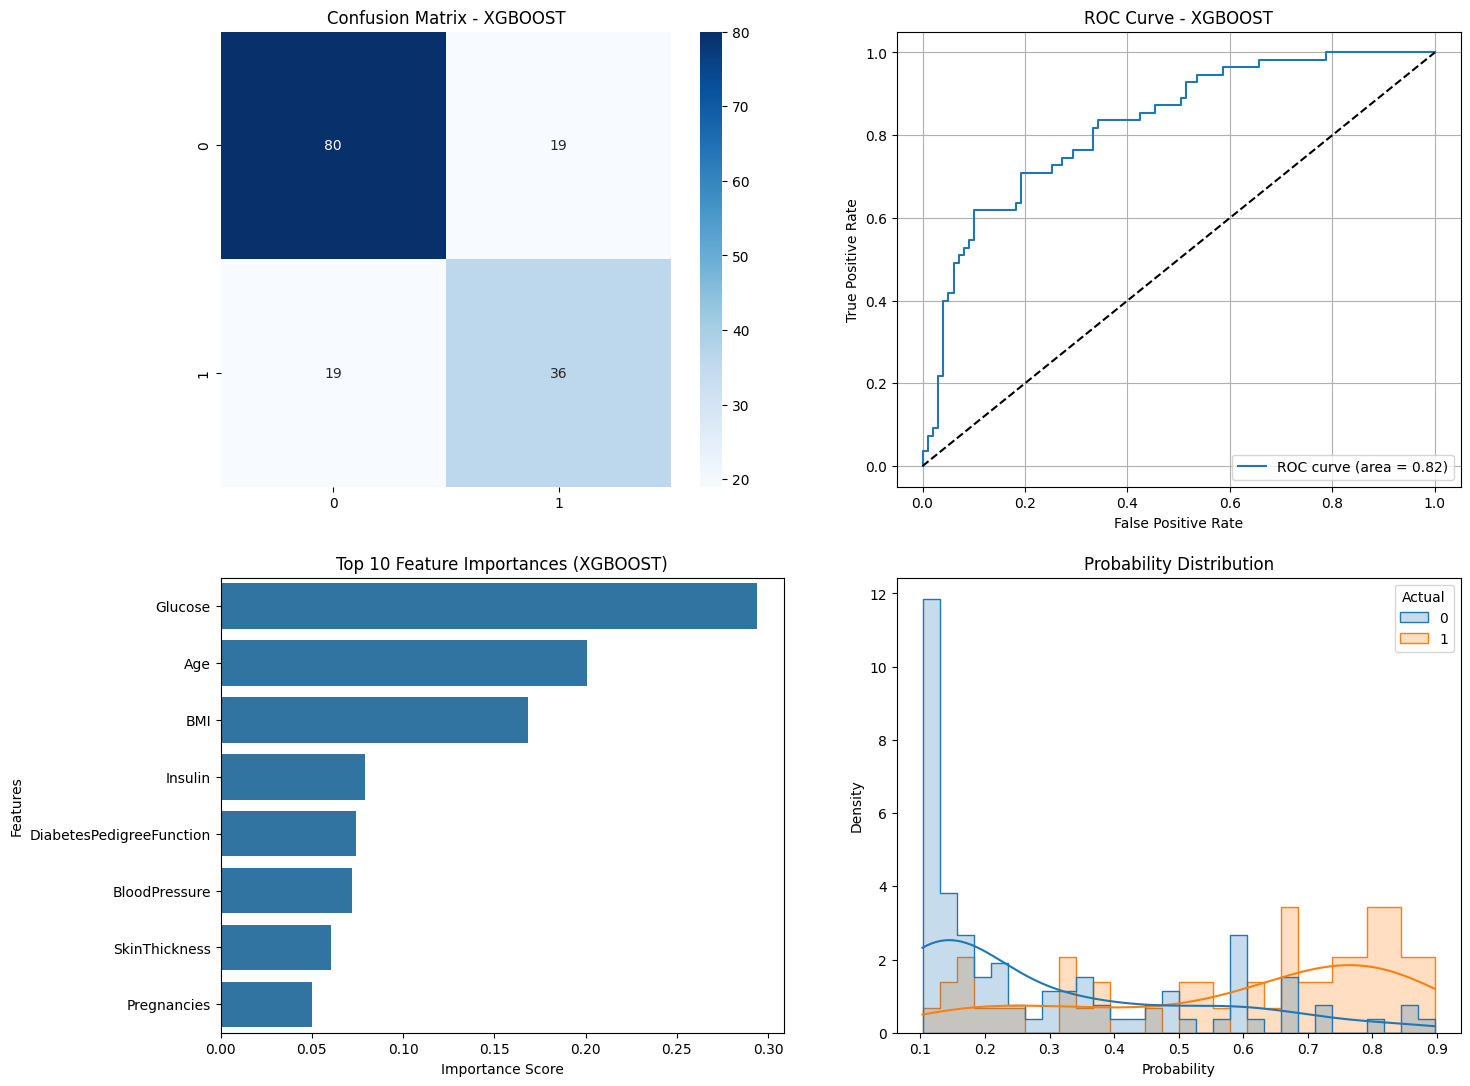

In [130]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 13))
axes = axes.flatten()

#confusion matrix heatmap plot
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - XGBOOST")

#ROC plot
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
axes[1].plot([0, 1], [0, 1], "k--")  
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - XGBOOST")
axes[1].legend(loc="lower right")
axes[1].grid(True)

#feature importance
feature_imp = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10], ax=axes[2])
axes[2].set_title("Top 10 Feature Importances (XGBOOST)")
axes[2].set_xlabel("Importance Score")
axes[2].set_ylabel("Features")

# Probability Distribution
sns.histplot(
    data=pd.DataFrame({'Probability': y_prob_xgb, 'Actual': y_test}),
    x='Probability', hue='Actual', bins=30,
    kde=True, element='step', stat='density', common_norm=False,
    ax=axes[3]
)
axes[3].set_title('Probability Distribution')